# Binding classification with Neural network

----

- Cross validation using the all data

- Using all observations (all species, </=/> values too)

- simple one-hot encoding scheme for all categorical variables (species, hla type/subtypes,sequence)


----


Note: this is the result of a lucky seed, further evaluations are necessary.

---

In [1]:
import os,sys
os.environ['THEANO_FLAGS']='device=gpu1'

#my functions
sys.path.append('../')
from utils import load_all_data,my_keras_cv_predict,plot_roc

#go to working dir
work_dir='/data/data1/ribli/mhc/'
os.chdir(work_dir)

%matplotlib inline

Using Theano backend.
Using gpu device 1: GeForce GTX 670 (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5004)


### Load data

In [2]:
x,_,y_c=load_all_data(hla_representation='one-hot',
                      species_representation='one-hot',
                      seq_representation='one-hot')

### Define the neural network and train it

In [3]:
#create a very simple deepish model
from keras.models import Sequential
from keras.layers import Dense

#create model creator
def get_model(input_dim):
    """Creates Keras model needed."""
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

#train
y_pred=my_keras_cv_predict(get_model,x,y_c,n_folds=5,patience=3,verbose=2)

Train on 119040 samples, validate on 13227 samples
Epoch 1/100
Epoch 00000: val_loss improved from inf to 0.39023, saving model to best_model
3s - loss: 0.4162 - val_loss: 0.3902
Epoch 2/100
Epoch 00001: val_loss improved from 0.39023 to 0.32843, saving model to best_model
3s - loss: 0.3109 - val_loss: 0.3284
Epoch 3/100
Epoch 00002: val_loss did not improve
3s - loss: 0.2753 - val_loss: 0.3354
Epoch 4/100
Epoch 00003: val_loss improved from 0.32843 to 0.32422, saving model to best_model
3s - loss: 0.2501 - val_loss: 0.3242
Epoch 5/100
Epoch 00004: val_loss improved from 0.32422 to 0.32295, saving model to best_model
3s - loss: 0.2289 - val_loss: 0.3230
Epoch 6/100
Epoch 00005: val_loss did not improve
3s - loss: 0.2090 - val_loss: 0.3386
Epoch 7/100
Epoch 00006: val_loss did not improve
3s - loss: 0.1908 - val_loss: 0.3571
Epoch 8/100
Epoch 00007: val_loss did not improve
3s - loss: 0.1740 - val_loss: 0.3682
Epoch 9/100
Epoch 00008: val_loss did not improve
Epoch 00008: early stopping

### Evaluate it 

AUC: 0.927521257436


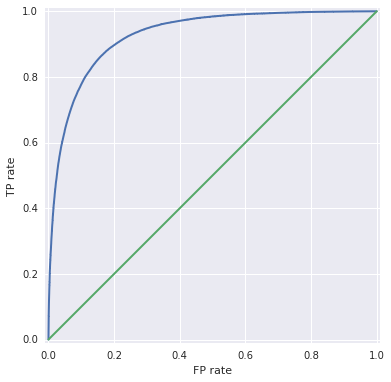

In [4]:
plot_roc(y_c,y_pred)